In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
date_columns = ['Internship_deadline', 'Earliest_Start_Date', 'Start Date', 
                'End Date', 'Start_Date']

train_merged = pd.read_csv('../data/train_merged.csv', parse_dates=date_columns)
test_merged = pd.read_csv('../data/test_merged.csv', parse_dates=date_columns)

## Load encoded data sets

In [2]:
train_merged_encoded = pd.read_csv('../data/train_merged_encoded.csv')
test_merged_encoded = pd.read_csv('../data/test_merged_encoded.csv')

## Training dataset

In [3]:
train_merged_encoded.head()

,Internship_ID,Student_ID,Earliest_Start_Date,Expected_Stipend,Minimum_Duration,Preferred_location,Is_Part_Time,Is_Shortlisted,Internship_Profile,Skills_required,...,num_awards,num_previous_internships,Stipend_level,stipend_expectation_by_exp,expectations_match,Earliest_Start_Date_month,is_Dec_or_Jan,whether_applied_previously,missing_profile,missing_skills_required
0,8161,78663553,2015-01-03 00:00:00.000000000,1,3,0,0,0,1817,0,...,0,1,3,1,0,1,1,1,0,1
1,4977,7695797,2014-12-19 00:00:00.000000000,2,2,5,1,0,1607,0,...,0,0,0,0,1,12,1,0,1,1
2,10271,78663092,2015-01-06 00:00:00.000000000,2,6,0,0,0,981,0,...,0,0,0,0,1,1,1,1,1,1
3,7393,7708503,2014-12-03 00:00:00.000000000,1,1,5,0,0,732,0,...,0,0,0,0,1,12,1,1,1,1
4,11125,78659782,2015-01-02 00:00:00.000000000,0,6,0,1,0,184,219,...,0,0,0,0,1,1,1,1,1,0


## Test set

In [4]:
test_merged_encoded.head()

,Internship_ID,Student_ID,Earliest_Start_Date,Expected_Stipend,Minimum_Duration,Preferred_location,Is_Part_Time,Internship_Profile,Skills_required,Internship_Type,...,num_awards,num_previous_internships,Stipend_level,stipend_expectation_by_exp,expectations_match,Earliest_Start_Date_month,is_Dec_or_Jan,whether_applied_previously,missing_profile,missing_skills_required
0,9341,7677714,2015-01-25 00:00:00.000000000,1,2,19,0,435,0,0,...,0,0,2,1,1,1,1,1,1,1
1,6426,7696418,2015-01-21 00:00:00.000000000,2,5,0,0,66,0,0,...,0,1,2,0,1,1,1,1,0,1
2,5812,78666725,2015-01-09 00:00:00.000000000,0,5,0,1,1423,0,0,...,0,0,2,1,0,1,1,1,1,1
3,10711,7705454,2015-01-11 00:00:00.000000000,3,2,0,1,382,0,1,...,0,0,0,0,1,1,1,1,1,1
4,5880,7711946,2015-01-15 00:00:00.000000000,3,2,5,1,1870,729,0,...,2,1,2,1,1,1,1,1,0,0


## Class Distribution

In [6]:
train_merged_encoded.Is_Shortlisted.value_counts()

0    168003
1     24579
Name: Is_Shortlisted, dtype: int64

## Exploratory Data Analysis

In [16]:
train_merged.loc[:, 'Earliest_Start_Date_year'] = train_merged.Earliest_Start_Date.dt.year
train_merged.loc[:, 'Earliest_Start_Date_month'] = train_merged.Earliest_Start_Date.dt.month
train_merged.loc[:, 'Earliest_Start_Date_day'] = train_merged.Earliest_Start_Date.dt.day

test_merged.loc[:, 'Earliest_Start_Date_year'] = test_merged.Earliest_Start_Date.dt.year
test_merged.loc[:, 'Earliest_Start_Date_month'] = test_merged.Earliest_Start_Date.dt.month
test_merged.loc[:, 'Earliest_Start_Date_day'] = test_merged.Earliest_Start_Date.dt.day

train_merged.loc[:, 'Internship_deadline_year'] = train_merged.Internship_deadline.dt.year
train_merged.loc[:, 'Internship_deadline_month'] = train_merged.Internship_deadline.dt.month
train_merged.loc[:, 'Internship_deadline_day'] = train_merged.Internship_deadline.dt.day

test_merged.loc[:, 'Internship_deadline_year'] = test_merged.Internship_deadline.dt.year
test_merged.loc[:, 'Internship_deadline_year'] = test_merged.Internship_deadline.dt.month
test_merged.loc[:, 'Internship_deadline_year'] = test_merged.Internship_deadline.dt.day

### How do the acceptance rate change during different years ?

In [17]:
train_merged.groupby(['Earliest_Start_Date_year', 'Is_Shortlisted']).size()

Earliest_Start_Date_year  Is_Shortlisted
2014                      0                 106197
                          1                  17865
2015                      0                  61806
                          1                   6714
dtype: int64

In [22]:
train_merged.groupby(['Earliest_Start_Date_month', 'Is_Shortlisted']).size().unstack(1).fillna(0)

Is_Shortlisted,0,1
Earliest_Start_Date_month,,
1,52354,6098
2,2924,237
3,575,35
4,1963,127
5,2686,150
6,1101,61
7,126,2
8,25,0
9,6,0


## Students application count

In [16]:
application_count = train_merged.groupby('Student_ID').size()

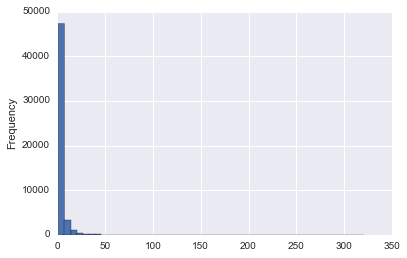

In [11]:
train_merged.groupby('Student_ID').size().order(ascending=False).plot(kind='hist', bins=50);

** As you can see very few people have applied for than 1 internship **

In [40]:
train_merged.groupby(['Student_ID', 'Is_Shortlisted']).size().unstack(1).fillna(0).sort_values(by=1, ascending=False).head()

Is_Shortlisted,0,1
Student_ID,,
7706394,268,53
7690898,147,40
7654664,172,26
7701363,61,24
7708160,156,23


## Whether a student has applied previously

In [20]:
train_merged.loc[:, 'whether_applied_previously'] = train_merged.Student_ID.map(lambda x: int( application_count.ix[x] > 1 ))

In [22]:
train_merged.groupby(['whether_applied_previously', 'Is_Shortlisted']).size()

whether_applied_previously  Is_Shortlisted
0                           0                  20373
                            1                   2654
1                           0                 147630
                            1                  21925
dtype: int64

## If you haven't mentioned anything in your profile

In [26]:
train_merged.loc[:, 'missing_profile'] = train_merged.Profile.isnull().astype(np.int)

In [27]:
train_merged.groupby(['missing_profile', 'Is_Shortlisted']).size()

missing_profile  Is_Shortlisted
0                0                  54280
                 1                   9947
1                0                 113723
                 1                  14632
dtype: int64

## If internship hasn't mentioned any skills required

In [36]:
train_merged.loc[:, 'missing_skills_required'] = train_merged.Skills_required.isnull().astype(np.int)

In [37]:
train_merged.groupby(['missing_skills_required', 'Is_Shortlisted']).size()

missing_skills_required  Is_Shortlisted
0                        0                  22397
                         1                   4497
1                        0                 145606
                         1                  20082
dtype: int64

## What do people mention in their profiles ?

In [33]:
train_merged[['Internship_Profile', 'Profile', 'Skills_required' ,'Is_Shortlisted']].head(100)

,Internship_Profile,Profile,Skills_required,Is_Shortlisted
0,Voice Over Movie,About C,NaN,0
1,Social Media Marketing & Design,NaN,NaN,0
2,Java Development,NaN,NaN,0
3,Fashion Curator,NaN,NaN,0
4,Business Development,NaN,"Communication,Business Development (Sales)",0
5,Creative Writing And Graphic Design,Studied Construction On Site,"Graphic Designing,Graphic Designing,Graphic De...",1
6,Production Engineer,NaN,COMPUTER KNOWLEDGE IN WORD / EXCEL / POWER POI...,0
7,Survey Engineer,NaN,NaN,0
8,Business Analyst,"Research & Analysis (Meta-Analysis, Statistics...",NaN,1
9,PHP Development,NaN,NaN,0


## Relationship of Stipend and Performance in Undergraduate studies

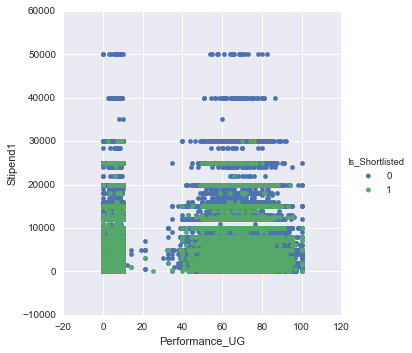

In [42]:
sns.FacetGrid(train_merged, hue="Is_Shortlisted", size=5) \
   .map(plt.scatter, "Performance_UG", "Stipend1") \
   .add_legend();

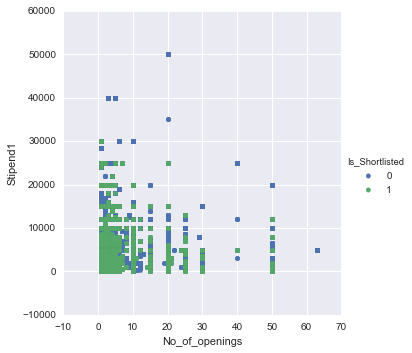

In [46]:
sns.FacetGrid(train_merged, hue="Is_Shortlisted", size=5) \
   .map(plt.scatter, "No_of_openings", "Stipend1") \
   .add_legend();

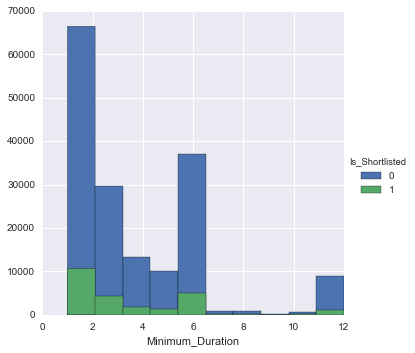

In [58]:
sns.FacetGrid(train_merged, hue="Is_Shortlisted", size=5) \
   .map(plt.hist, "Minimum_Duration") \
   .add_legend();

## Preferred Location

In [8]:
train_merged_encoded.Preferred_location.value_counts().head(20)

0      130691
5       32294
21       9621
19       4642
53       3775
14       2234
39       2201
37       2060
51       1009
78        948
32        698
138       386
82        314
12        140
142       127
18        113
91         81
135        75
87         73
31         68
Name: Preferred_location, dtype: int64

In [9]:
train_merged_encoded.Institute_location.value_counts().head()

77     35077
233    18964
64     15948
46      9362
157     9063
Name: Institute_location, dtype: int64

## What if your preferred location matches with internship location ?

In [51]:
train_merged.loc[:, 'location_matches'] = (train_merged.Internship_Location == train_merged.Preferred_location).astype(np.int)

In [52]:
train_merged.groupby(['location_matches', 'Is_Shortlisted']).size()

location_matches  Is_Shortlisted
0                 0                 157746
                  1                  22956
1                 0                  10257
                  1                   1623
dtype: int64

## Pivot Tables

In [61]:
train_merged.pivot_table(index='Is_Shortlisted', columns=['Minimum_Duration', 'Expected_Stipend'],
                         values='Performance_12th', aggfunc='mean', margins=True)

Minimum_Duration          1                                                2  \
Expected_Stipend       10K+       2-5K      5-10K No Expectations       10K+   
Is_Shortlisted                                                                 
0                 78.606045  80.750268  80.164372       78.892453  76.103827   
1                 80.887475  82.392616  82.013584       81.471198  79.419254   
All               78.887996  81.001756  80.416012       79.249588  76.465805   

Minimum_Duration                                                3             \
Expected_Stipend       2-5K      5-10K No Expectations       10K+       2-5K   
Is_Shortlisted                                                                 
0                 79.387255  77.450547       77.674254  72.815536  76.767582   
1                 80.612153  79.091611       79.971334  75.669970  80.144285   
All               79.575912  77.665161       77.985696  73.133013  77.278508   

Minimum_Duration    ...                  10         11                        \
Expected_Stipend    ...     No Expectations       10K+       2-5K      5-10K   
Is_Shortlisted      ...                                                        
0                   ...           72.783022  72.362973  71.907500  66.388919   
1                   ...           74.323750  74.400000  69.933333  88.087500   
All                 ...           73.013411  72.467436  71.512667  68.505854   

Minimum_Duration                         12                        \
Expected_Stipend No Expectations       10K+       2-5K      5-10K   
Is_Shortlisted                                                      
0                      68.888462  68.005935  70.448030  69.370279   
1                      72.166667  67.724789  72.904100  70.516275   
All                    69.325556  67.979919  70.825766  69.490094   

Minimum_Duration                        All  
Expected_Stipend No Expectations             
Is_Shortlisted                               
0                      68.754481  74.089945  
1                      70.215764  76.891402  
All                    68.921151  74.447491  

[3 rows x 49 columns]

## Are there any internship student id pair that exist in both training and test sets ?

In [10]:
def get_pairs(internship_ids, student_ids):
    pairs = []
    for (internship_id, student_id) in zip(internship_ids, student_ids):
        pairs.append((internship_id, student_id))
    
    return pairs

In [11]:
train_pairs = get_pairs(train_merged_encoded.Internship_ID, train_merged_encoded.Student_ID)
test_pairs = get_pairs(test_merged_encoded.Internship_ID, test_merged_encoded.Student_ID)

In [14]:
# are there any common pairs
train_pairs_set = set(train_pairs)
test_pairs_set = set(test_pairs)

print 'Common internship and student ids in both training and test set are \n%s' %(train_pairs_set & test_pairs_set)

Common internship and student ids in both training and test set are 
set([])


## Dimensionality Reduction

In [31]:
features_to_drop = ['Earliest_Start_Date', 'Start_Date', 'Start Date', 'End Date',
            'Is_Shortlisted', 'Internship_deadline', 'PG_scale', 'UG_Scale']

features = train_merged_encoded.columns.drop(features_to_drop)

X = train_merged_encoded[features]
y = train_merged_encoded.Is_Shortlisted

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
from sklearn.decomposition import PCA

In [91]:
pca = PCA(n_components=2, whiten=False)
X_pca = pca.fit_transform(X_scaled)

In [92]:
np.sum(pca.explained_variance_ratio_)

0.037309132539354771

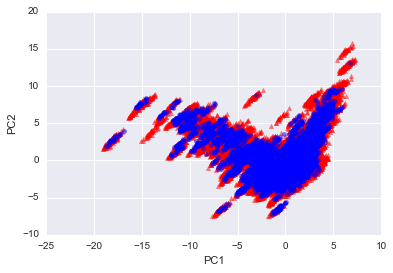

In [36]:
# plot
negative_class_labels = (y==0).values
positive_class_labels = (y==1).values

plt.scatter(X_pca[negative_class_labels, 0], X_pca[negative_class_labels, 1],
            color='red', marker='^', alpha=.5)

plt.scatter(X_pca[positive_class_labels, 0], X_pca[positive_class_labels, 1],
            color='blue', marker='o', alpha=.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show();

## Clustering

In [37]:
# clustering
from sklearn.cluster import KMeans

In [125]:
km = KMeans(n_clusters=13, max_iter=300, n_jobs=-1, random_state=44)

In [126]:
y_km = km.fit_predict(X_pca)

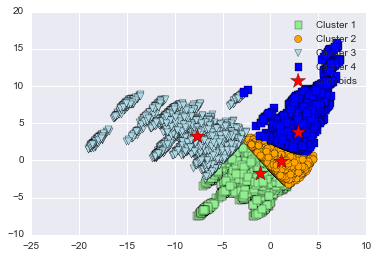

In [119]:
plt.scatter(X_pca[y_km==0, 0], X_pca[y_km==0, 1], s=50, c='lightgreen', marker='s', label='Cluster 1')
plt.scatter(X_pca[y_km==1, 0], X_pca[y_km==1, 1], s=50, c='orange', marker='o', label='Cluster 2')
plt.scatter(X_pca[y_km==2, 0], X_pca[y_km==2, 1], s=50, c='lightblue', marker='v', label='Cluster 3')
plt.scatter(X_pca[y_km==3, 0], X_pca[y_km==3, 1], s=50, c='blue', marker='s', label='Cluster 4')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='centroids')
plt.legend(loc='best')
plt.show();

## Elbow method to find right number of clusters

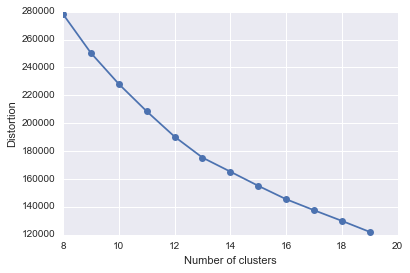

In [123]:
distortions = []

for i in range(8, 20):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=43, n_jobs=-1)
    km.fit(X_pca)
    distortions.append(km.inertia_)

plt.plot(range(8, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show();

In [127]:
pd.crosstab(y_km, y)

Is_Shortlisted,0,1
row_0,,
0,7107,2071
1,13971,1821
2,5331,627
3,3394,433
4,31568,6300
5,6538,518
6,1893,319
7,10316,953
8,5510,471


In [ ]:
train_merged_encoded[y_km==4].head

In [111]:
train_merged_encoded[y_km==5].loc[:, ['Stipend1','Is_Shortlisted']].Stipend1.describe()

count     3258.000000
mean      4136.588870
std       3373.996563
min         10.000000
25%       2000.000000
50%       3500.000000
75%       5000.000000
max      28500.000000
Name: Stipend1, dtype: float64

In [112]:
train_merged_encoded[y_km==3].loc[:, ['Stipend1','Is_Shortlisted']].Stipend1.describe()

count    53225.000000
mean      5795.624966
std       3730.532637
min          5.000000
25%       3000.000000
50%       5000.000000
75%       7500.000000
max      30000.000000
Name: Stipend1, dtype: float64